In [1]:
import healpy as hp
import pandas as pd
import numpy as np
from DS_healpix_fragmentation import radec2pix
from astropy.coordinates import SkyCoord
from astropy import units as u
%config InlineBackend.figure_format = 'retina'

In [2]:
pz = pd.read_csv('/home/rt2122/Data/detected_cats/full_pz14_thr0.1_step8.csv')
pzact = pd.read_csv('/home/rt2122/Data/detected_cats/full_pz_act10_thr0.1_step8.csv')
df = pd.read_csv('/home/rt2122/Data/detected_cats/full_pz_all_found34_thr0.1_step8_no_fn.csv')

In [15]:
nside = 2**6

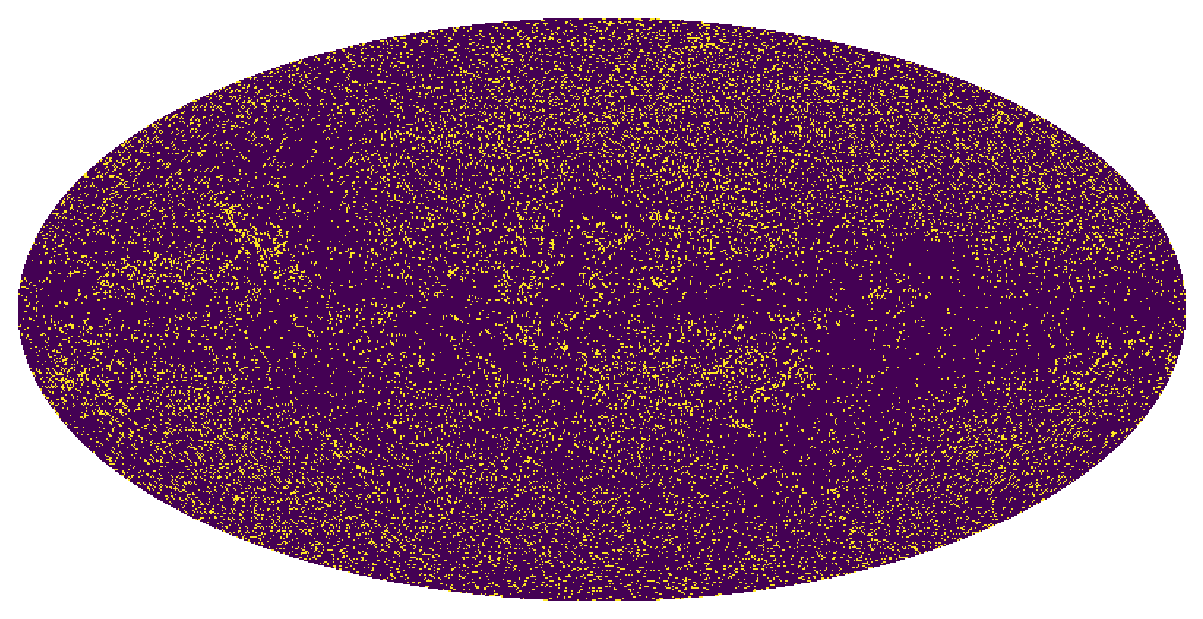

In [7]:
a = np.zeros(hp.nside2npix(nside))
a[radec2pix(df['RA'], df['DEC'], nside)] = 1
hp.mollview(a, nest=True, title='', cbar=False)

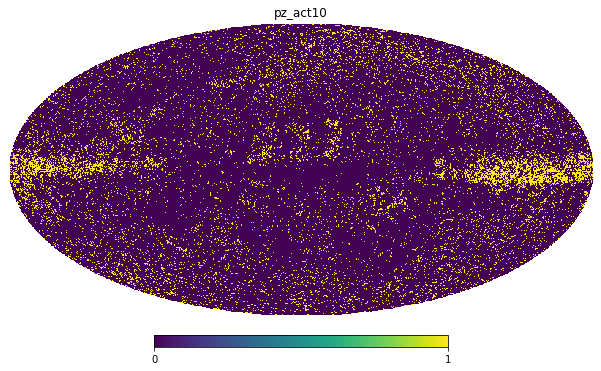

In [5]:
a = np.zeros(hp.nside2npix(nside))
a[radec2pix(pzact['RA'], pzact['DEC'], nside)] = 1
hp.mollview(a, nest=True, title='pz_act10')

In [9]:
def cut_cat_b(df, b_cut = 20):
    sc = SkyCoord(ra=np.array(df['RA'])*u.degree, dec=np.array(df['DEC'])*u.degree, frame='icrs')
    b = sc.galactic.b.degree
    df = df[np.abs(b) > b_cut]
    df.index = np.arange(len(df))
    return df

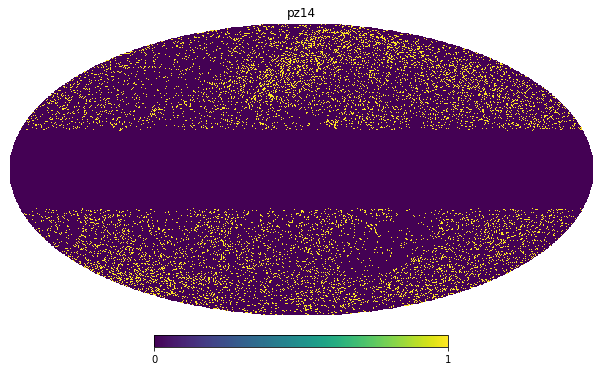

In [10]:
a = np.zeros(hp.nside2npix(nside))
pz = cut_cat_b(pz)
a[radec2pix(pz['RA'], pz['DEC'], nside)] = 1
hp.mollview(a, nest=True, title='pz14')

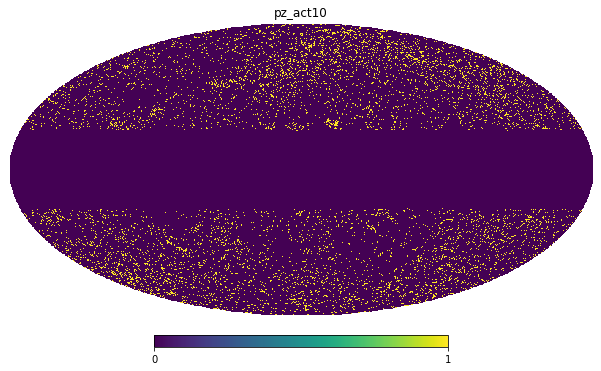

In [11]:
a = np.zeros(hp.nside2npix(nside))
pzact = cut_cat_b(pzact)
a[radec2pix(pzact['RA'], pzact['DEC'], nside)] = 1
hp.mollview(a, nest=True, title='pz_act10')

In [4]:
planck_z = pd.read_csv('/home/rt2122/Data/original_catalogs/csv/PSZ2.csv')
sc = SkyCoord(ra=np.array(planck_z['RA']) * u.degree, dec=np.array(planck_z['DEC']) * u.degree, frame='icrs')
planck_z['b'] = sc.galactic.b.degree

In [5]:
planck_z.shape

(1653, 5)

In [6]:
np.count_nonzero(np.abs(planck_z['b']) >= 20)

1342

In [2]:
mcxcwp = pd.read_csv('/home/rt2122/Data/clusters/mcxcwp.csv')
actwp = pd.read_csv('/home/rt2122/Data/clusters/actwp.csv')

In [3]:
msc = SkyCoord(ra=mcxcwp['RA']*u.degree, dec=mcxcwp['DEC']*u.degree, frame='icrs')
asc = SkyCoord(ra=actwp['RA']*u.degree, dec=actwp['DEC']*u.degree, frame='icrs')

In [4]:
_, d2d, _ = msc.match_to_catalog_sky(asc)
np.count_nonzero(d2d.degree < 5 / 60)

0

In [10]:
psz2 = pd.read_csv('/home/rt2122/Data/original_catalogs/csv/PSZ2.csv')
mcxc = pd.read_csv('/home/rt2122/Data/original_catalogs/csv/MCXC.csv')
rm = pd.read_csv('/home/rt2122/Data/original_catalogs/csv/RM.csv')
act = pd.read_csv('/home/rt2122/Data/original_catalogs/csv/ACT.csv')
abell = pd.read_csv('/home/rt2122/Data/original_catalogs/csv/Abell.csv')

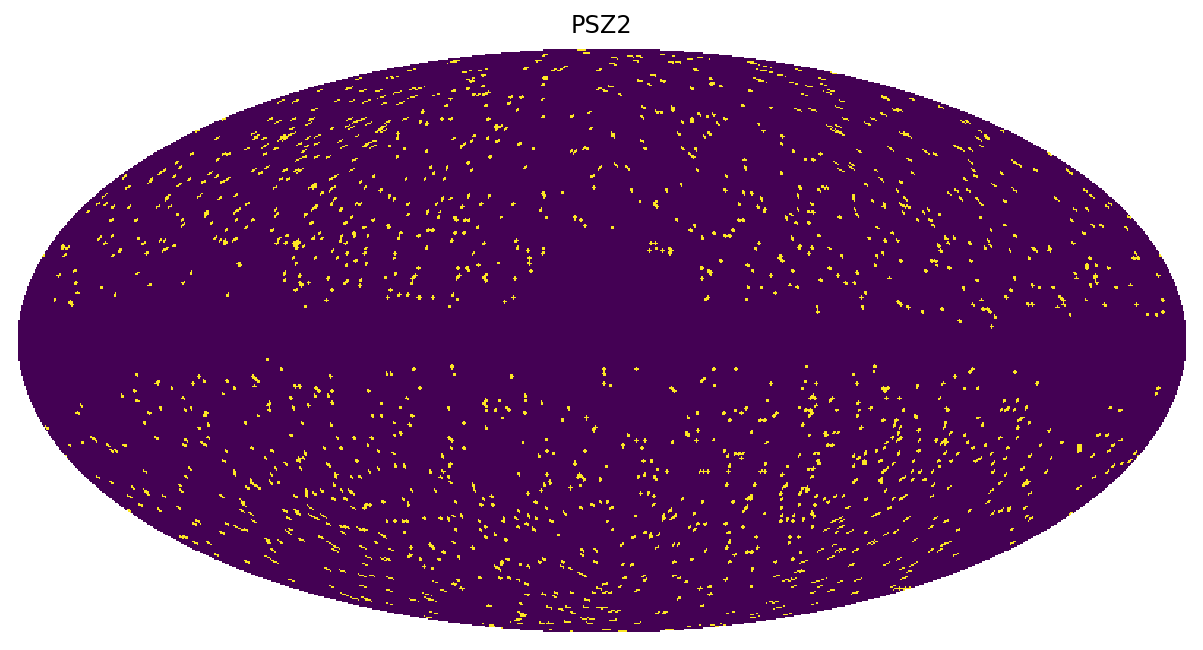

In [16]:
a = np.zeros(hp.nside2npix(nside))
df = psz2
a[radec2pix(df['RA'], df['DEC'], nside)] = 1
hp.mollview(a, nest=True, title='PSZ2', cbar=False)

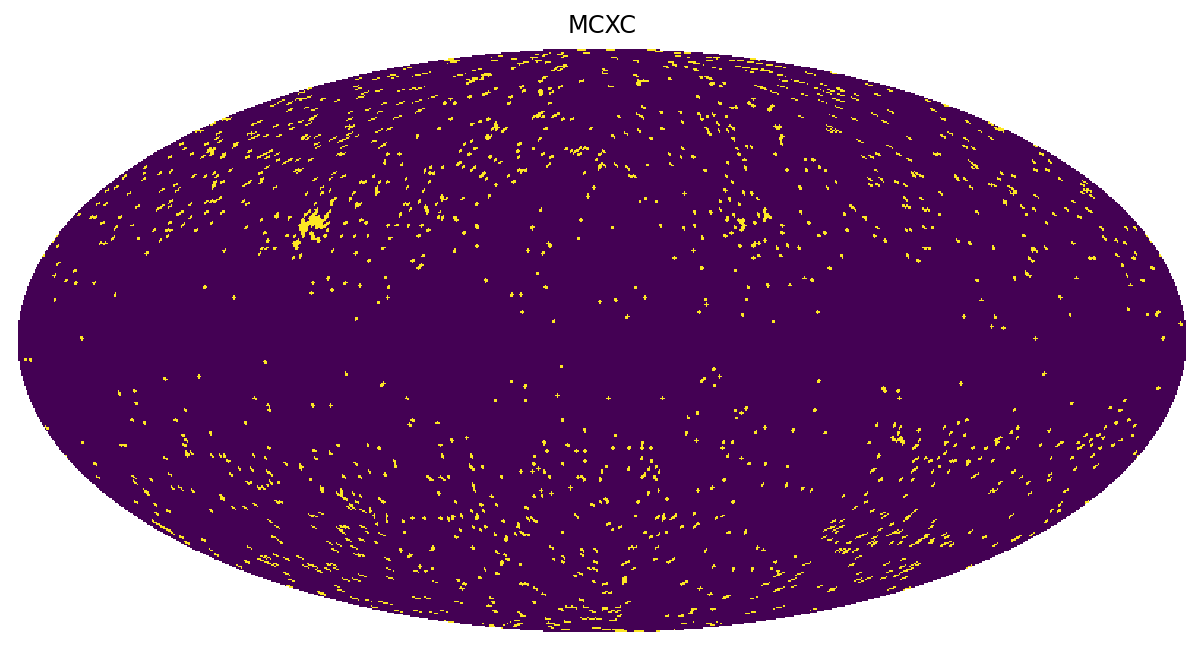

In [17]:
a = np.zeros(hp.nside2npix(nside))
df = mcxc
a[radec2pix(df['RA'], df['DEC'], nside)] = 1
hp.mollview(a, nest=True, title='MCXC', cbar=False)

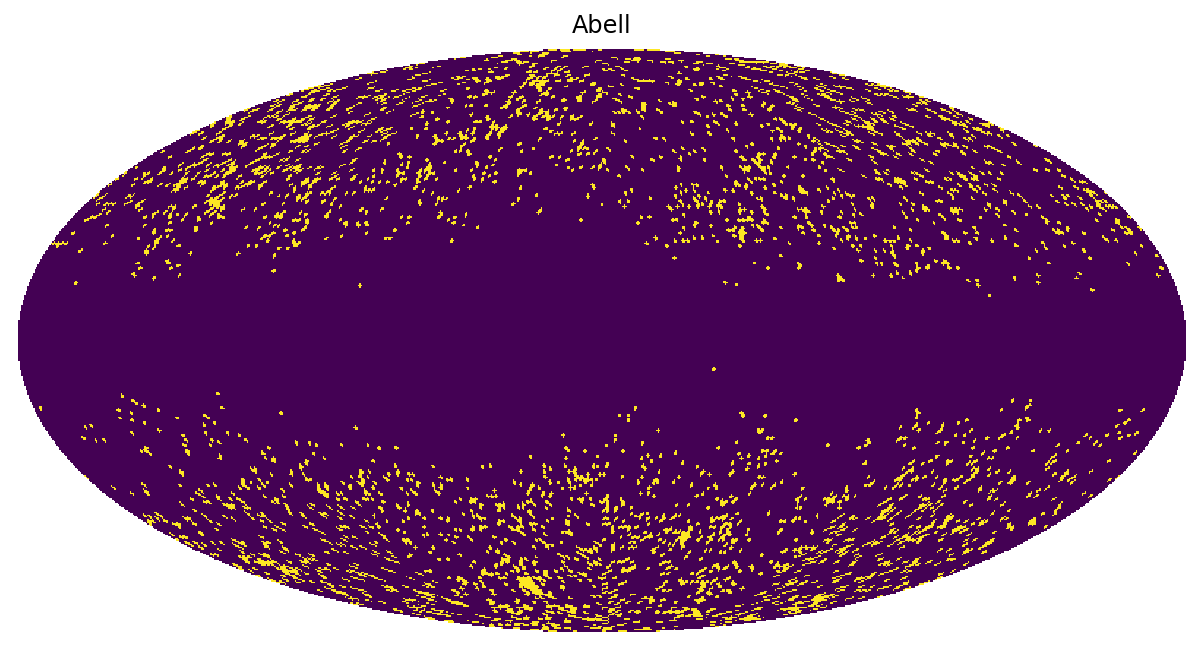

In [18]:
a = np.zeros(hp.nside2npix(nside))
df = abell 
a[radec2pix(df['RA'], df['DEC'], nside)] = 1
hp.mollview(a, nest=True, title='Abell', cbar=False)

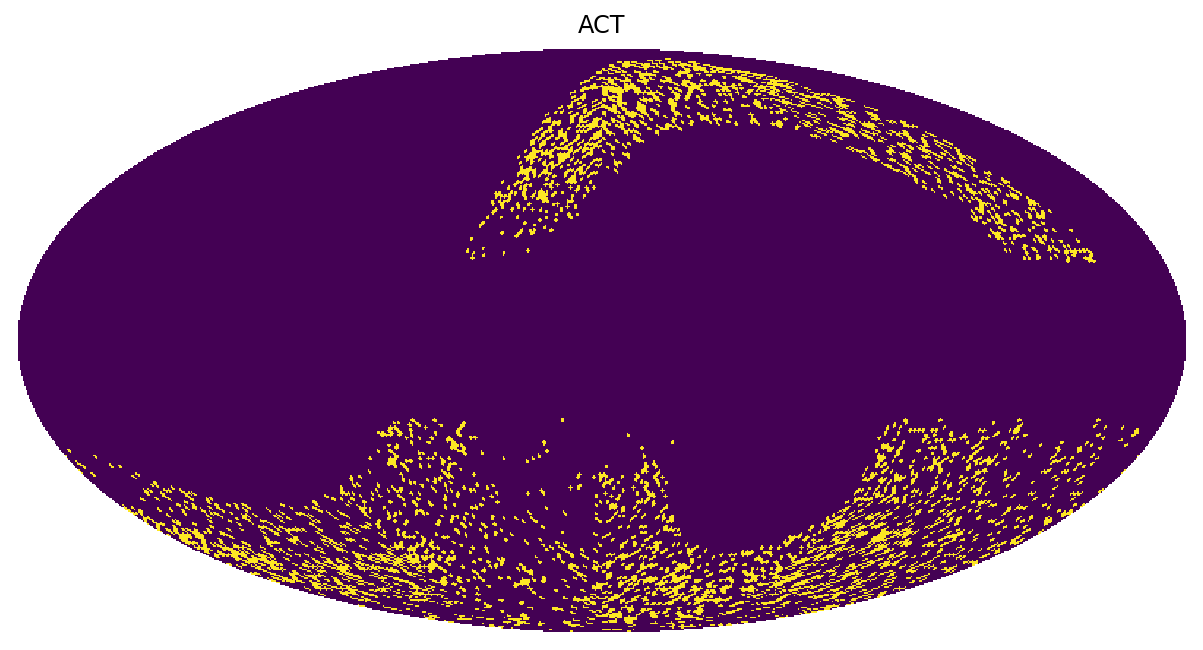

In [19]:
a = np.zeros(hp.nside2npix(nside))
df = act
a[radec2pix(df['RA'], df['DEC'], nside)] = 1
hp.mollview(a, nest=True, title='ACT', cbar=False)

In [8]:
rm.shape

(26111, 2)